# P03: Simulation of Multivariate Data and Plotting Confidence Regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.stats import norm, chi2,f

## 1. Generate the correted data with specific mean and covariance matrix

Steps: 
- Generate two (or more) $n$ random normal observations ($X$) with mean zero and std 1
- Perform Cholesky decomposition of the given co-variance matrix ($\Sigma$ and take the lower triangular matrix $L$ from that. ($LL^T = \Sigma$)
- Pre-multiply the $L$ with  $X$. Now, this $X$ will have the mean 0 and co-variace $\Sigma$.
- To move the observations with centre at the given mean $\mu$, add the outer product of the one vector $(1,\dots,1)_{n \times 1}$ and $\mu$.
- Now, the mean of $X$ will $\mu$ (approx).


In [2]:
def generate_corrected_data(num_samples,mu,cov_mat):
    init_x = norm.rvs(size=(len(cov_mat),num_samples),random_state=101)
    C = la.cholesky(cov_mat,lower= True)
    X = np.dot(C,init_x)
    # move the center to mu
    X = X + np.outer(np.ones(num_samples),mu).transpose()
    return X

## Using Numpy Library

In [3]:
cov_mat = np.array([[1.1,-1],[-1,1]])
mu = np.array([0,0])
X = np.random.multivariate_normal(mean =[0,0], cov = cov_mat,size=100 ).transpose()
np.corrcoef(X[0],X[1])

array([[ 1.        , -0.95712796],
       [-0.95712796,  1.        ]])

## Plotting the simulated data for different correlation values

In [4]:
rhos = np.array([-1,-0.75,-0.5,-0.25,0,.25,.5,.75,1])
rhos_mesh = rhos.reshape(3,3)
rhos_mesh

array([[-1.  , -0.75, -0.5 ],
       [-0.25,  0.  ,  0.25],
       [ 0.5 ,  0.75,  1.  ]])

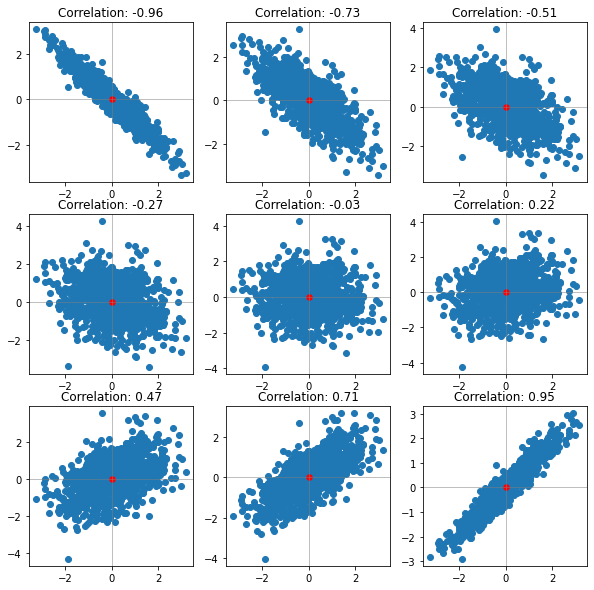

In [5]:
num_samples = 1000
mu = [0,0]
rhos = np.array([-1,-0.75,-0.5,-0.25,0,.25,.5,.75,1])
rhos_mesh = rhos.reshape(3,3)
nrows,ncols = rhos_mesh.shape
fig, axs = plt.subplots(figsize = (10,10),nrows=nrows, ncols=ncols)
for rhos_row, ax_row in zip(rhos_mesh,axs):
    for rho, ax in zip(rhos_row,ax_row):
        cov_mat = [[1.1,rho],[rho,1]]
        X = generate_corrected_data(num_samples,mu,cov_mat)
        ax.scatter(X[0],X[1])
        ax.scatter(mu[0],mu[1],s=30,c='red')
        ax.axhline(c='grey',lw=.5)
        ax.axvline(c='grey',lw=.5)
        corr_computed = np.corrcoef(X[0],X[1])[0,1].round(2)
        ax.set_title(f'Correlation: {corr_computed}')
plt.show()

Text(0.5, 1.0, 'Correlation: -0.9563503502723353')

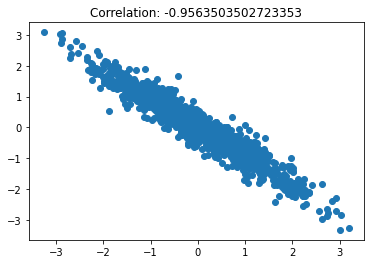

In [6]:
init_x = norm.rvs(size=(2,1000))
cov_mat = np.array([[1.1,-1],[-1,1]])
mu = np.array([0,0])

X = generate_corrected_data(num_samples = 1000, mu = mu, cov_mat = cov_mat)
corr_ = np.corrcoef(X[0],X[1])[0,1]
plt.scatter(X[0], X[1])
plt.title(f"Correlation: {corr_}")

## 2. Confidence Regions

In [7]:
from matplotlib.patches import Ellipse

In [8]:
num_samples = 1000
mu = [1,2]
cov_mat = [[1.1,0.75],[0.75,1]]
X = generate_corrected_data(num_samples,mu,cov_mat)
data = pd.DataFrame(X.transpose())
data.head()

,0,1
0,3.838968,4.391164
1,1.658791,2.396902
2,1.952286,2.380469
3,1.528417,2.666170
4,1.682898,2.109769


In [9]:
def draw_confidence_ellipse(data,alpha,**kwargs):
    dof = len(data.columns)
    n=num_samples
    if n-dof > 40:
        c = np.sqrt(chi2.ppf(1-alpha, dof))
    else:
        c =  np.sqrt((dof*(n-1)/(n-dof))*f.ppf(1-alpha,dof,n-dof))
        
    mean_vec = np.array(data.mean())
    cov_matrix = np.array(data.cov())
    # find the eigenvalues and eigenvectors
    eigvals, eigvecs = la.eigh(cov_matrix)
    # sorting based on the descending order of eigenvalues
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    # Width and height of ellipse to draw
    width, height = 2 * c * np.sqrt(eigvals)
    
    #Angle of the major axis
    vx, vy =  eigvecs[:,0][0], eigvecs[:,0][1]
    angle = np.degrees(np.arctan2(vy,vx))
    return Ellipse(mean_vec,
                   width = width,
                   height = height,
                   angle = angle,
                   fill = False,
                   label = f"{100*(1-alpha):.0f}%", **kwargs)

In [10]:
def plot_data_confidence_ellipse(data,ax,alphas = [0.01,0.05,0.1],colors = ['red','Blue','Orange']):
    ax.scatter(data[0],data[1])
    ax.scatter(data.mean()[0], data.mean()[1], s=100)
    for alpha,color in zip(alphas,colors):
        e = draw_confidence_ellipse(data,alpha=alpha,color=color,lw=2)
        ax.add_patch(e)



In [11]:
def plot_confidence_regions(data,ax):
    fig, ax = plt.subplots(figsize=(8,8))
    plot_data_confidence_ellipse(data=data,ax=ax)
    plt.legend()
    plt.show()

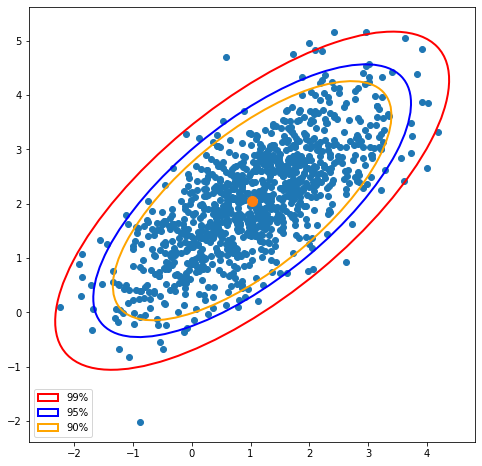

In [12]:
plot_confidence_regions(data,ax)

## Extra credits

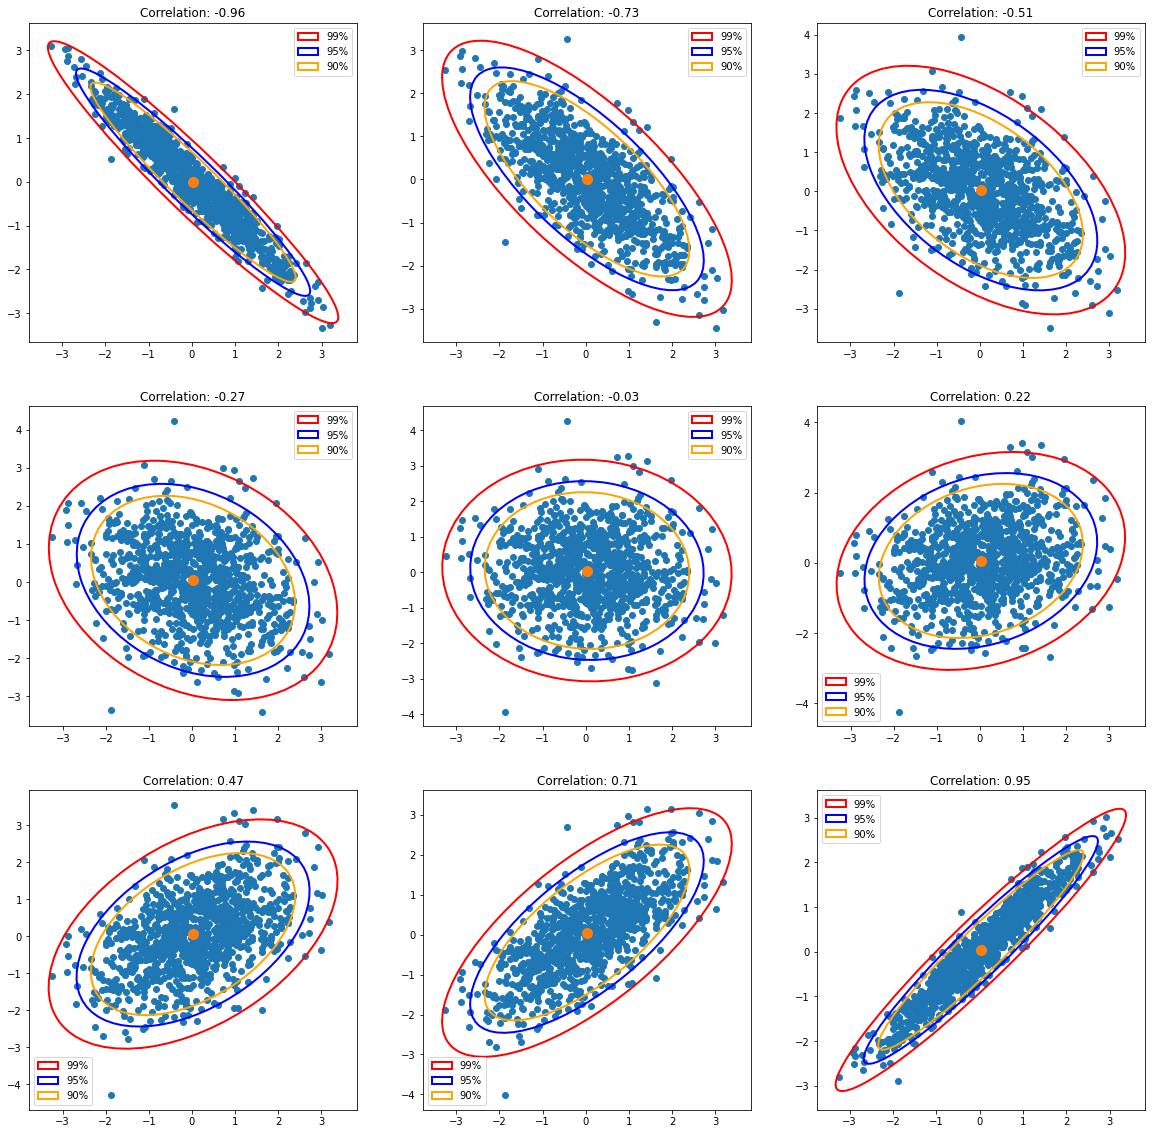

In [13]:
num_samples = 1000
mu = [0,0]
rhos = np.array([-1,-0.75,-0.5,-0.25,0,.25,.5,.75,1])
rhos_mesh = rhos.reshape(3,3)
nrows,ncols = rhos_mesh.shape
fig, axs = plt.subplots(figsize = (20,20),nrows=nrows, ncols=ncols)
for rhos_row, ax_row in zip(rhos_mesh,axs):
    for rho, ax in zip(rhos_row,ax_row):
        cov_mat = [[1.1,rho],[rho,1]]
        X = generate_corrected_data(num_samples,mu,cov_mat)
        data = pd.DataFrame(X.transpose())
        plot_data_confidence_ellipse(data=data,ax=ax)
        ax.legend()
        ax.set_title(f'Correlation: {data.corr()[0][1].round(2)}')
plt.show()